##### 샘플 데이터

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd "/content/drive/MyDrive/Colab Notebooks/24.08.06 DCX 미니 프로젝트/day2"

/content/drive/MyDrive/Colab Notebooks/24.08.06 DCX 미니 프로젝트/day2


In [ ]:
import pandas as pd
import pickle
from ast import literal_eval

# CSV 파일을 읽어와서 DataFrame으로 저장
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/24.08.06 DCX 미니 프로젝트/day1/Cluster1.csv")
# tagged_review 열의 문자열을 리스트로 변환
df['tagged_review'] = df['tagged_review'].apply(literal_eval)

# DataFrame을 pickle 파일로 저장
with open("./actor.pkl", 'wb') as f:
    pickle.dump(df, f)


In [ ]:
import pandas as pd
import pickle
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
with open("./actor.pkl", 'rb') as f : # read binary
  df = pickle.load(f)

df.head()

,Unnamed: 0,time,review,Review_clean,tagged_review,vector,cluster
0,0,2020. 3. 9. 0:31,노키즈존 세 이하 입장 불가 일요일 간만에 일찍 아점 먹고낮잠 쿨쿨 자다가뽈뽈부부...,노키즈존 세 이하 입장 불가 일요일 간만에 일찍 아점 먹고낮잠 쿨쿨 자다가뽈뽈부부...,"[노, 키즈, 존, 세, 이하, 입장, 불가, 일요일, 간만, 일찍, 점, 먹다, ...",[-3.49399894e-02 -3.46432216e-02 -1.36281669e-...,3
1,1,2020. 11. 11. 10:49,쉬냐 너 모르냐 오늘 빼빼로데이 잖아 우왓 퀸 퀸 스페이드는 놀래켰는데 역시 얼음왕...,쉬냐 너 모르냐 오늘 빼빼로데이 잖아 우왓 퀸 퀸 스페이드는 놀래켰는데 역시 얼음왕...,"[쉬다, 모르다, 오늘, 빼빼로데이, 잖다, 우왓, 퀸, 퀸, 스, 페이, 들다, ...",[-6.14227466e-02 6.17473684e-02 -5.77614605e-...,2
2,2,2021. 3. 22. 10:56,같아서 언이를 불러 필름카메라를 찍기로 했다 아침 일찍부터 일어나서 박콩님 산책 시...,같아서 언이를 불러 필름카메라를 찍기로 했다 아침 일찍부터 일어나서 박콩님 산책 시...,"[불다, 필름, 카메라, 찍기, 아침, 일찍, 일어나서, 박콩, 산책, 일찍, 일어...",[-0.00664277 0.03634558 -0.16829349 0.293787...,2
3,3,2021. 9. 21. 0:42,표지는 글 분위기랑 안 어울리게 너무 강렬해서벽 뒤로 슬그머니 피해야할 것 같았다...,표지는 글 분위기랑 안 어울리게 너무 강렬해서벽 뒤로 슬그머니 피해야할 것 같았다...,"[표지, 글, 분위기, 안, 어울리다, 강렬하다, 벽, 뒤, 슬그머니, 피해, 야하...",[-0.05672868 0.07924302 -0.08991845 0.088532...,3
4,4,2021. 9. 11. 21:29,쉽지 않다 은셔랑 이번에 한국와서 제일 친해짐 생각난 김에 은서랑 아이스크림 사먹으...,쉽지 않다 은셔랑 이번에 한국와서 제일 친해짐 생각난 김에 은서랑 아이스크림 사먹으...,"[쉬다, 않다, 은셔, 한국, 서다, 제일, 친해지다, 생각나다, 김, 은서, 아이...",[ 0.00735973 0.09689447 -0.13035624 0.317814...,2


In [ ]:
df2 = df[["review", "tagged_review", "cluster"]].copy()
df2.head()

,review,tagged_review,cluster
0,노키즈존 세 이하 입장 불가 일요일 간만에 일찍 아점 먹고낮잠 쿨쿨 자다가뽈뽈부부...,"[노, 키즈, 존, 세, 이하, 입장, 불가, 일요일, 간만, 일찍, 점, 먹다, ...",3
1,쉬냐 너 모르냐 오늘 빼빼로데이 잖아 우왓 퀸 퀸 스페이드는 놀래켰는데 역시 얼음왕...,"[쉬다, 모르다, 오늘, 빼빼로데이, 잖다, 우왓, 퀸, 퀸, 스, 페이, 들다, ...",2
2,같아서 언이를 불러 필름카메라를 찍기로 했다 아침 일찍부터 일어나서 박콩님 산책 시...,"[불다, 필름, 카메라, 찍기, 아침, 일찍, 일어나서, 박콩, 산책, 일찍, 일어...",2
3,표지는 글 분위기랑 안 어울리게 너무 강렬해서벽 뒤로 슬그머니 피해야할 것 같았다...,"[표지, 글, 분위기, 안, 어울리다, 강렬하다, 벽, 뒤, 슬그머니, 피해, 야하...",3
4,쉽지 않다 은셔랑 이번에 한국와서 제일 친해짐 생각난 김에 은서랑 아이스크림 사먹으...,"[쉬다, 않다, 은셔, 한국, 서다, 제일, 친해지다, 생각나다, 김, 은서, 아이...",2


# ◆ 1. LDA를 위한 데이터 전처리
* 1.1. 전체 단어의 사전 만들고 각 문서에 매칭하기
    > 단어들이 문서에 얼마나 위치해 있는지 분포를 파악해야하기 때문에 분석할 전체 데이터 대상으로
    사용된 단어의 사전을 생성해야한다,


In [ ]:
import gensim
from gensim import corpora, models
from gensim.corpora import Dictionary

### 1.1 전체 단어의 사전 만들고 각 문서에 매칭하기

In [ ]:
df_cluster0 = df2[df2['cluster'] ==0]
display(df_cluster0.head())
display(df_cluster0.shape)

,review,tagged_review,cluster
164,요 오름입니다 어느새 우려와 걱정이 많던 도쿄올림픽도 개막을 했는데요 저는 양궁남녀...,"[요, 오름, 어느새다, 우려, 걱정, 많다, 도쿄올림픽, 개막, 양궁, 남녀, 혼...",0
191,무더웠던 작년 여름 비투비 서은광의 복귀작 썸씽로튼 초연이라서 사전정보가 없었던터라...,"[무덥다, 작년, 여름, 비투비, 서은광, 복귀, 작, 썸씽, 로튼, 초연, 정보,...",0
199,올해의 첫 밤을 자랑하고 싶었으아빠가 산책하다가 나 줄라고 주워왔대 귀여워 신나서...,"[올해, 첫, 밤, 자랑, 싶다, 아빠, 산책, 줄라, 줍다, 오다, 귀엽다, 신나...",0
206,나 때문에 공연 보기가 힘든 요즘 온라인 중계가 많아지고 있다 월 두 달 동안 방구...,"[때문, 공연, 보기, 힘드다, 요즘, 온라인, 중계, 많아지다, 두, 달, 방, ...",0
213,드디어 호피폴라 콘서트에 다녀왔다 콘서트를 갔다온지 년 년 된것 같다 무려 년 뷰...,"[호피, 폴라, 콘서트, 다녀오다, 콘서트, 가다, 온, 무려, 뷰티풀, 쇼, 마지...",0


(124, 3)

In [ ]:
# 단어사전 구축
all_docs = list(df_cluster0['tagged_review'])
dictionary = Dictionary(all_docs)

In [ ]:
# 단어사전 확인
(dictionary.token2id)

{'가깝다': 0,
 '가능하다': 1,
 '가다': 2,
 '가동': 3,
 '가성': 4,
 '가세': 5,
 '가시다': 6,
 '가지': 7,
 '개막': 8,
 '객석': 9,
 '걱정': 10,
 '건물': 11,
 '게이트': 12,
 '결승': 13,
 '경기': 14,
 '경기도': 15,
 '계속': 16,
 '고민': 17,
 '곳': 18,
 '곳곳': 19,
 '공연': 20,
 '공연장': 21,
 '관람': 22,
 '교환': 23,
 '구경': 24,
 '구매': 25,
 '구시': 26,
 '군': 27,
 '규모': 28,
 '그렇다': 29,
 '그리다': 30,
 '글': 31,
 '글라스': 32,
 '금메달': 33,
 '금지': 34,
 '기입': 35,
 '기존': 36,
 '기차': 37,
 '길어지다': 38,
 '꼭': 39,
 '꼭꼭': 40,
 '꾸미다': 41,
 '끝나다': 42,
 '나가다': 43,
 '나뉘어지다': 44,
 '나오다': 45,
 '날': 46,
 '남기다': 47,
 '남녀': 48,
 '남아': 49,
 '낫다': 50,
 '내부': 51,
 '다가': 52,
 '다행': 53,
 '단축': 54,
 '대다': 55,
 '대여': 56,
 '더': 57,
 '더무': 58,
 '덕분': 59,
 '덥다': 60,
 '도': 61,
 '도국': 62,
 '도착': 63,
 '도쿄올림픽': 64,
 '돌아다니다': 65,
 '동시': 66,
 '돼다': 67,
 '되어다': 68,
 '두다': 69,
 '두시': 70,
 '둘러보다': 71,
 '뒤': 72,
 '드라큘라': 73,
 '드리다': 74,
 '들다': 75,
 '들르다': 76,
 '따다': 77,
 '따라가다': 78,
 '때문': 79,
 '로비': 80,
 '만하': 81,
 '많다': 82,
 '말': 83,
 '말씀': 84,
 '맑은': 85,
 '맛집': 86,
 '맞다': 87,
 '먹다': 88,
 '멋있

In [ ]:
# 단어사전 길이 확인
len(dictionary.token2id)

7646

In [ ]:
# 구축된 단어사전을 이용해서 BOW 실시
corpus = []
for doc in all_docs :
  corpus.append(dictionary.doc2bow(doc))

In [ ]:
len(corpus)

124

In [ ]:
corpus[10]

[(2, 2),
 (16, 1),
 (20, 4),
 (24, 2),
 (27, 1),
 (29, 5),
 (31, 1),
 (34, 1),
 (37, 1),
 (42, 2),
 (53, 3),
 (57, 7),
 (61, 1),
 (67, 5),
 (68, 1),
 (75, 8),
 (79, 2),
 (83, 3),
 (87, 1),
 (88, 2),
 (90, 1),
 (93, 1),
 (96, 2),
 (99, 1),
 (116, 1),
 (120, 8),
 (129, 1),
 (130, 1),
 (137, 1),
 (140, 2),
 (142, 1),
 (149, 2),
 (154, 3),
 (155, 3),
 (162, 1),
 (163, 3),
 (164, 2),
 (167, 2),
 (169, 1),
 (170, 1),
 (171, 2),
 (179, 1),
 (188, 1),
 (191, 3),
 (213, 3),
 (218, 2),
 (219, 1),
 (223, 2),
 (226, 1),
 (227, 4),
 (231, 15),
 (237, 1),
 (238, 1),
 (242, 1),
 (248, 1),
 (250, 1),
 (251, 1),
 (256, 2),
 (260, 1),
 (269, 1),
 (287, 1),
 (290, 4),
 (298, 3),
 (302, 1),
 (306, 1),
 (307, 1),
 (308, 1),
 (309, 1),
 (312, 1),
 (323, 1),
 (329, 2),
 (334, 2),
 (340, 3),
 (358, 1),
 (365, 5),
 (367, 1),
 (379, 1),
 (380, 1),
 (404, 2),
 (407, 5),
 (408, 3),
 (417, 3),
 (420, 1),
 (428, 7),
 (430, 1),
 (442, 2),
 (447, 1),
 (449, 1),
 (472, 2),
 (476, 1),
 (480, 3),
 (484, 1),
 (487, 1),
 

# ◆ 2. LDA모델 만들기
* 2.1 LDA 기본 모델 만들기
* 2.2 LDA 토픽개수 선정
* 2.3 선정한 토픽 개수로 Action 넘버 매칭

### 2.1 LDA 기본 모델 만들기

In [ ]:
topic_num = 3 # 임시로 3개로 선택.
ldamodel = gensim.models.LdaModel(corpus, num_topics=topic_num, id2word=dictionary)

In [ ]:
# 토픽당 할당된 단어 확인
ldamodel.print_topics(num_words=5) # numwords 상위 단어들 중 중요하다고 생각하는 애들 정렬

[(0, '0.016*"공연" + 0.008*"보다" + 0.008*"수" + 0.005*"무대" + 0.005*"좋다"'),
 (1, '0.014*"공연" + 0.008*"수" + 0.008*"보다" + 0.007*"문화" + 0.005*"축제"'),
 (2, '0.011*"공연" + 0.010*"수" + 0.008*"보다" + 0.007*"좋다" + 0.005*"노래"')]

In [ ]:
# 문서별 topic 확률 확인
for i in range(len(corpus)):
  print(ldamodel.get_document_topics(corpus)[i])

[(2, 0.9924707)]
[(1, 0.9984218)]
[(1, 0.9554859), (2, 0.043684922)]
[(2, 0.9983283)]
[(0, 0.27136168), (2, 0.7276559)]
[(0, 0.76817566), (2, 0.23098646)]
[(2, 0.99827766)]
[(0, 0.021305544), (2, 0.9779241)]
[(0, 0.11815058), (1, 0.8804643)]
[(0, 0.98119307), (2, 0.018022912)]
[(0, 0.76066047), (1, 0.2386928)]
[(0, 0.15405087), (2, 0.845207)]
[(2, 0.9987609)]
[(2, 0.9980412)]
[(0, 0.98177254), (2, 0.017531758)]
[(1, 0.023348078), (2, 0.9759455)]
[(0, 0.21906328), (1, 0.77875566)]
[(1, 0.99764144)]
[(1, 0.9916063)]
[(0, 0.98956287)]
[(0, 0.976364), (1, 0.022567188)]
[(0, 0.774007), (2, 0.22513165)]
[(2, 0.9973579)]
[(1, 0.9956894)]
[(0, 0.8370531), (2, 0.16128893)]
[(1, 0.9984051)]
[(2, 0.9964445)]
[(0, 0.01953137), (1, 0.09150271), (2, 0.8889659)]
[(0, 0.13512658), (1, 0.8636399)]
[(0, 0.011920027), (2, 0.98432267)]
[(1, 0.4636625), (2, 0.5305962)]
[(1, 0.9970079)]
[(1, 0.06685138), (2, 0.9309074)]
[(0, 0.25777972), (2, 0.74078757)]
[(0, 0.06830758), (2, 0.93089837)]
[(1, 0.9964912)]
[

### 2.2 LDA 토픽개수 선정
* coherence & perplexcity

In [ ]:
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# coherence_model 만들어서 체크 : 토픽 개수를 3개로 설정했을때의 점수

top_n = 3  # 토픽을 3개로 잡았을 때에 coher와 perpl를 잡을 수 있게 하는 것

#perplexity
perplexity_score = ldamodel.log_perplexity(corpus)

#Coherence # 문서 간 응집도 계산
coherence_model = CoherenceModel(model=ldamodel, texts=all_docs, dictionary=dictionary, topn=top_n)
coherence_score = coherence_model.get_coherence()


print('Perplexity score :', perplexity_score)
print('Coherence score :', coherence_score)

Perplexity score : -8.154940892036333
Coherence score : 0.6076169236140779


> 2.2.1 Perplexity 그래프 만들기

In [ ]:
perplexity_values=[]

for i in range(2,10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word = dictionary)
    perplexity_v = ldamodel.log_perplexity(corpus)
    perplexity_values.append(perplexity_v)

Text(0, 0.5, 'Perplexity score')

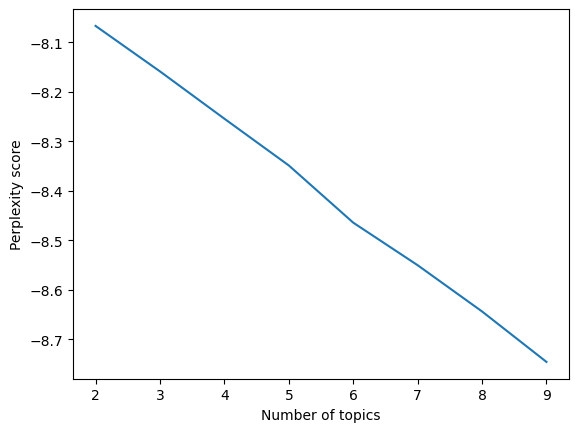

In [ ]:
#라인 그래프 만들기

x = range(2,10)
plt.plot(x, perplexity_values)
plt.xlabel('Number of topics')
plt.ylabel('Perplexity score')

> 2.2.1 Coherence 그래프 만들기

In [ ]:
coherence_values = []
for i in tqdm(range(2,10)):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word = dictionary)
    coherence_model = CoherenceModel(model=ldamodel, texts=all_docs, dictionary=dictionary, topn=i)
    coherence_score = coherence_model.get_coherence()
    coherence_values.append(coherence_score)

100%|██████████| 8/8 [00:12<00:00,  1.51s/it]


Text(0, 0.5, 'Coherence score')

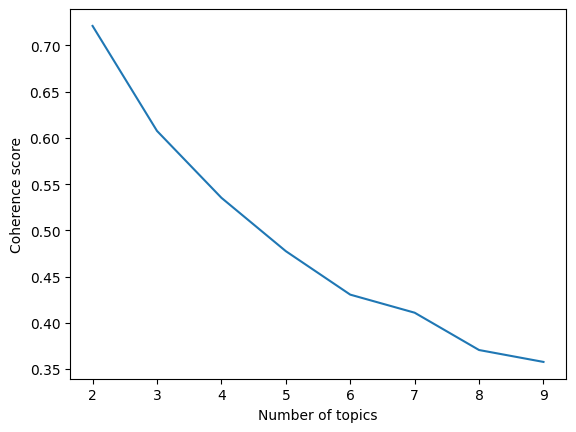

In [ ]:
#라인 그래프 만들기

x = range(2,10)
plt.plot(x, coherence_values)
plt.xlabel('Number of topics')
plt.ylabel('Coherence score')

### 2.3 선정한 토픽 개수로 Action 넘버 매칭

In [ ]:
topic_n = 5 # 액터가 5개의 주제에 대해 말하고 있다 -> 이것을 액션으로 바라봄, 5개의 액션
ldamodel = gensim.models.ldamodel.LdaModel(corpus, # BOW로 바꿔준 말뭉치
                                           num_topics = topic_n, # 토픽의 개수
                                           id2word=dictionary,
                                           random_state = 1, # 난수가 들어가 실행할 떄마다 다른 값이 나오지 않도록 하나로 고정
                                           passes=5)

In [ ]:
#document에 대한 label(action number) , 액터가 어떤 액션을 하고 있는지 찾기, 이 액션이 몇 번 토픽에 해당하는지 라벨을 달아보기
#documentdp 대한 probability
# 두개를 가지고 가장 높은 확률값을 가진 action number 찾기

action_align = []

for doc in tqdm(ldamodel.get_document_topics(corpus)): # 토픽 확률값을 얻어서 반복문을 돌리기. doc 안에는 하나의 문서에 대한 토픽확률이 들어있음
    label = []
    value = []
    for score in doc:       # 하나의 토픽에 대해서 0번일 확률, 1번일 확률, 2번일 확률
        label.append(score[0]) #토픽(=action N)
        value.append(score[1]) #토픽의 확률

    max_index = np.argmax(value)   #argmax 함수는 리스트에서 가장 max값 을 가진 인덱스를 반환, 최대값의 인덱스를 뽑아주는 역할
    action_n = label[max_index]
    action_align.append(action_n)

100%|██████████| 124/124 [00:00<00:00, 2263.35it/s]


In [ ]:
df_cluster0['action_cluster'] = action_align
df_cluster0.head()

,review,tagged_review,cluster,action_cluster
164,요 오름입니다 어느새 우려와 걱정이 많던 도쿄올림픽도 개막을 했는데요 저는 양궁남녀...,"[요, 오름, 어느새다, 우려, 걱정, 많다, 도쿄올림픽, 개막, 양궁, 남녀, 혼...",0,3
191,무더웠던 작년 여름 비투비 서은광의 복귀작 썸씽로튼 초연이라서 사전정보가 없었던터라...,"[무덥다, 작년, 여름, 비투비, 서은광, 복귀, 작, 썸씽, 로튼, 초연, 정보,...",0,4
199,올해의 첫 밤을 자랑하고 싶었으아빠가 산책하다가 나 줄라고 주워왔대 귀여워 신나서...,"[올해, 첫, 밤, 자랑, 싶다, 아빠, 산책, 줄라, 줍다, 오다, 귀엽다, 신나...",0,4
206,나 때문에 공연 보기가 힘든 요즘 온라인 중계가 많아지고 있다 월 두 달 동안 방구...,"[때문, 공연, 보기, 힘드다, 요즘, 온라인, 중계, 많아지다, 두, 달, 방, ...",0,4
213,드디어 호피폴라 콘서트에 다녀왔다 콘서트를 갔다온지 년 년 된것 같다 무려 년 뷰...,"[호피, 폴라, 콘서트, 다녀오다, 콘서트, 가다, 온, 무려, 뷰티풀, 쇼, 마지...",0,4


In [ ]:
df_cluster0 = df_cluster0.drop(columns=['tagged_review'])
df_cluster0.head()

,review,cluster,action_cluster
164,요 오름입니다 어느새 우려와 걱정이 많던 도쿄올림픽도 개막을 했는데요 저는 양궁남녀...,0,3
191,무더웠던 작년 여름 비투비 서은광의 복귀작 썸씽로튼 초연이라서 사전정보가 없었던터라...,0,4
199,올해의 첫 밤을 자랑하고 싶었으아빠가 산책하다가 나 줄라고 주워왔대 귀여워 신나서...,0,4
206,나 때문에 공연 보기가 힘든 요즘 온라인 중계가 많아지고 있다 월 두 달 동안 방구...,0,4
213,드디어 호피폴라 콘서트에 다녀왔다 콘서트를 갔다온지 년 년 된것 같다 무려 년 뷰...,0,4


In [ ]:
with open("./Cluster5_action.pkl", 'wb') as f : # read binary
  pickle.dump(df_cluster0, f)

# ◆ 3. LDA 시각화 (LDAvis)


In [ ]:
!pip install pyLDAvis

In [ ]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-3473d5610275>", line 1, in <cell line: 1>
    import pyLDAvis.gensim as gensimvis
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1002, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 945, in _find_spec
  File "<frozen importlib._bootstrap_external>", line 1439, in find_spec
  File "<frozen importlib._bootstrap_external>", line 1408, in _get_spec
  File "<frozen importlib._bootstrap_external>", line 1366, in _path_importer_cache
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, 

In [ ]:
prepared_data = gensimvis.prepare(ldamodel, corpus, dictionary ) # 5가지 모델로 학습시킨 lda 모델 가져오고 원문 가진 corpus 넣어주고 전체 단어사전 dictionary 넣어준다.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-87cb7f1cb9c8>", line 1, in <cell line: 1>
    prepared_data = gensimvis.prepare(ldamodel, corpus, dictionary ) # 5가지 모델로 학습시킨 lda 모델 가져오고 원문 가진 corpus 넣어주고 전체 단어사전 dictionary 넣어준다.
NameError: name 'gensimvis' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinn

In [ ]:
pyLDAvis.save_html(prepared_data, 'my_lda_action_0.html')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-d108d39864c6>", line 1, in <cell line: 1>
    pyLDAvis.save_html(prepared_data, 'my_lda_action_0.html')
NameError: name 'pyLDAvis' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/py

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-d108d39864c6>", line 1, in <cell line: 1>
    pyLDAvis.save_html(prepared_data, 'my_lda_action_0.html')
NameError: name 'pyLDAvis' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/usr/local/lib/python3.10/

In [ ]:
pyLDAvis.display(prepared_data)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-143ee6540499>", line 1, in <cell line: 1>
    pyLDAvis.display(prepared_data)
NameError: name 'pyLDAvis' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-packages/IPy

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-143ee6540499>", line 1, in <cell line: 1>
    pyLDAvis.display(prepared_data)
NameError: name 'pyLDAvis' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core

# ◆ 4. LDA 분석을 위한 후작업
* LDAvis와 LDA모델의 토픽 넘버 매칭
* LDAvis 결과와 LDA모델의 결과를 보고 직접 매칭해야한다.

In [ ]:
# LDA 모델에서 모든 토픽과 그 번호를 가져오기
topics = ldamodel.show_topics(num_topics=-1, formatted=True) # -1은 가지고 있는 토픽 다 사용해달라는것.
for topic_id, topic_desc in topics:
    print(f"Topic ID: {topic_id}, Description: {topic_desc}")

In [ ]:
#LDAvis와 LDA 수동으로 토픽 매칭
new_action_topic = []
for i in tqdm(df_cluster0.action_cluster):
    if i == 2:
        n = 5
    elif i == 0:
        n = 4 # 원문에 넘버링 된 토픽 번호와 LDA Viz 와 매칭해주기

    elif i == 4:
        n = 1

    elif i == 1:
        n = 3

    elif i == 3:
        n = 2

    else:
        n=6
    new_action_topic.append(n)

In [ ]:
# 기존 컬럼 재배치
df_cluster0.action_cluster = new_action_topic

In [ ]:
df_cluster0 = df_cluster0[['Review','cluster','action_cluster']]
df_cluster0.to_csv('Cluster0.csv', encoding='utf-8-sig')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-31-7af9788ea766>", line 1, in <cell line: 1>
    df_cluster0 = df_cluster0[['Review','cluster','action_cluster']]
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py", line 3899, in __getitem__
    indexer = self.columns._get_indexer_strict(key, "columns")[1]
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py", line 6115, in _get_indexer_strict
    self._raise_if_missing(keyarr, indexer, axis_name)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py", line 6179, in _raise_if_missing
    raise KeyError(f"{not_found} not in index")
KeyError: "['Review'] not in index"

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.




During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 248, in wrapped
    return f(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 281, in _fixed_getinnerframes
    records = fix_frame_records_filenames(inspect.getinnerframes(etb, context))
  File "/usr/lib/python3.10/inspect.py", line 1662, in getinnerframes
    frameinfo = (tb.tb_frame,) + getframeinfo(tb, context)
  File "/usr/lib/python3.10/inspect.py", line 1620, in getframeinfo
    filename = getsourcefile(frame) or getfile(frame)
  File "/usr/lib/python3.10/inspect.py", line 829, in getsourcefile
    module = getmodule(object, filename)
  File "/usr/lib/python3.10/inspect.py", lin